__Hoja de trabajo Proyecto BMW - Esther__

In [1550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler


1.Importar dataset

In [1551]:
df_bmw = pd.read_csv('dataset/bmw_pricing_v3.csv')

In [1552]:
df_bmw.sample(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1874,BMW,520,180010.0,142.0,NaN,diesel,NaN,hatchback,True,True,False,NaN,True,NaN,True,True,22500.0,2018-02-01
4655,BMW,X1,95394.0,105.0,2013-03-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,19200.0,2018-08-01
2551,BMW,530 Gran Turismo,55305.0,190.0,2014-04-01,diesel,black,sedan,True,True,False,NaN,False,False,True,True,26800.0,2018-08-01
3927,BMW,X1,112687.0,135.0,2014-02-01,diesel,silver,suv,False,NaN,False,True,True,False,True,False,16500.0,2018-02-01
2079,BMW,318 Gran Turismo,132715.0,105.0,2014-04-01,diesel,black,NaN,False,True,False,False,False,False,True,False,15700.0,2018-04-01


In [1553]:
df_bmw.shape

(4843, 18)

In [1554]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

Primeros comentarios:
1. Varias columnas con nulos
2. Solo el campo 'gps' es tipo booleano, en cambio campos como volante_regulable, aire_acondicionado, camara_trasera...alerta_lim_velocidad son 'objects' a pesar de tener valores 'True/False' 

In [1555]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

2. Análisis duplicados: vemos que no hay duplicados

In [1556]:
df_bmw[df_bmw.duplicated()].shape

(0, 18)

3. Análisis nulos

In [1557]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1. Analizamos los campos con más nulos

3.1.1. MARCA: vemos que solo tiene dos valores 'BMW' y 'nan'. Por lo tanto como no aporta información, la borramos (haciendo una copia antes)


In [1558]:
df_bmw['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [1559]:
df_bmw1 =  df_bmw.copy()

In [1560]:
del(df_bmw1['marca'])

In [1561]:
df_bmw1.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [1562]:
df_bmw1.shape

(4843, 17)

3.1.2 FECHA REGISTO: columna con demasiados nulos. La eliminamos.

In [1563]:
df_bmw1['fecha_registro'].value_counts(dropna = False, normalize = True) * 100

fecha_registro
NaN           50.030973
2013-07-01     1.920297
2014-03-01     1.713814
2014-05-01     1.672517
2013-01-01     1.610572
2013-10-01     1.589924
2014-02-01     1.527979
2013-06-01     1.383440
2014-01-01     1.383440
2013-02-01     1.383440
2013-11-01     1.259550
2012-10-01     1.259550
2013-04-01     1.218253
2014-04-01     1.197605
2013-09-01     1.197605
2013-03-01     1.197605
2013-08-01     1.115011
2012-06-01     1.115011
2014-07-01     1.115011
2014-09-01     1.011770
2013-05-01     0.949824
2014-08-01     0.929176
2012-11-01     0.887879
2012-03-01     0.867231
2014-06-01     0.846583
2013-12-01     0.825934
2012-01-01     0.722693
2014-10-01     0.722693
2014-11-01     0.702044
2012-04-01     0.702044
2012-07-01     0.681396
2012-09-01     0.660747
2012-08-01     0.598802
2015-03-01     0.578154
2012-05-01     0.557506
2012-12-01     0.536857
2012-02-01     0.392319
2015-06-01     0.392319
2015-10-01     0.392319
2015-01-01     0.371670
2015-05-01     0.371670
2

In [1564]:
df_bmw2 =  df_bmw1.copy()

In [1565]:
df_bmw2.shape

(4843, 17)

In [1566]:
del(df_bmw2['fecha_registro'])

In [1567]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1.3 COLOR: Muchos nulos, pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin color'

In [1568]:
df_bmw2['color'].value_counts(dropna = False, normalize = True) * 100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

In [1569]:
df_bmw2[df_bmw2['color'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
49,118,147180.0,100.0,diesel,NaN,coupe,True,NaN,True,NaN,False,False,True,NaN,8400.0,2018-07-01
63,640,69695.0,230.0,diesel,NaN,coupe,True,True,False,NaN,NaN,True,True,True,36300.0,2018-02-01
64,420,61300.0,135.0,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,27700.0,2018-02-01
81,420,64386.0,135.0,diesel,NaN,coupe,False,False,False,NaN,True,True,True,NaN,23800.0,2018-03-01
88,420,125965.0,135.0,diesel,NaN,coupe,False,True,False,NaN,True,True,True,False,23400.0,2018-04-01


In [1570]:
df_bmw3 = df_bmw2.copy()

In [1571]:
df_bmw3['color'].fillna('sin color', inplace=True)

In [1572]:
df_bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1.4 TIPO_COCHE: Muchos nulos, pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin tipo_coche'

In [1573]:
df_bmw3['tipo_coche'].value_counts(dropna = False, normalize = True) * 100

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

In [1574]:
df_bmw3['tipo_coche'].fillna('sin tipo_coche', inplace=True)

3.1.5 AIRE_ACONDICIONADO: Varios nulos, pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin info aire_acondicionado'

In [1575]:
df_bmw3['aire_acondicionado'].value_counts(dropna = False, normalize = True) * 100

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

In [1576]:
df_bmw3['aire_acondicionado'].fillna('sin_info', inplace=True)

3.1.6 ASIENTOS_PLEGABLES: Columna no relevante con muchos nulos. La elimino.

In [1577]:
df_bmw3['asientos_traseros_plegables'].value_counts(dropna = False, normalize = True) * 100

asientos_traseros_plegables
NaN      70.018584
False    23.745612
True      6.235804
Name: proportion, dtype: float64

In [1578]:
df_bmw4 = df_bmw3.copy()

In [1579]:
del(df_bmw4['asientos_traseros_plegables'])

3.1.7 BLUETOOTH: Columna no relevante con muchos nulos. La elimino.

In [1580]:
df_bmw4['bluetooth'].value_counts(dropna = False, normalize = True) * 100

bluetooth
False    64.402230
True     20.565765
NaN      15.032005
Name: proportion, dtype: float64

In [1581]:
del(df_bmw4['bluetooth'])

3.1.8 ALERTA_LIM_VELOCIDAD: Columna no relevante con muchos nulos. La elimino.

In [1582]:
df_bmw4['alerta_lim_velocidad'].value_counts(dropna = False, normalize = True) * 100

alerta_lim_velocidad
True     46.252323
False    38.715672
NaN      15.032005
Name: proportion, dtype: float64

In [1583]:
del(df_bmw4['alerta_lim_velocidad'])

In [1584]:
df_bmw4.isnull().sum()

modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
gps                     0
precio                  6
fecha_venta             1
dtype: int64

In [1585]:
df_bmw4.isnull().shape

(4843, 13)

3.2 Analizamos las categorías con muy pocos nulos: modelo, km, potencia, tipo_gasolina, volante_regulable, camara_trasera, elevalunas_electrico, precio, fecha_venta

In [1586]:
col_few_nulls = ['modelo', 'km', 'potencia', 'tipo_gasolina', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'precio', 'fecha_venta']

In [1587]:
num_rows_nulls = len(df_bmw4[df_bmw4['modelo'].isnull() | df_bmw4['km'].isnull() | df_bmw4['tipo_gasolina'].isnull() | df_bmw4['volante_regulable'].isnull() | df_bmw4['camara_trasera'].isnull() | df_bmw4['elevalunas_electrico'].isnull() | df_bmw4['precio'].isnull() | df_bmw4['fecha_venta'].isnull()]) 
print(num_rows_nulls)
print(num_rows_nulls / df_bmw4.shape[0] * 100)

25
0.5162089613875697


In [1588]:
df_num_rows_nulls = df_bmw4[df_bmw4['modelo'].isnull() | df_bmw4['km'].isnull() | df_bmw4['tipo_gasolina'].isnull() | df_bmw4['volante_regulable'].isnull() | df_bmw4['camara_trasera'].isnull() | df_bmw4['elevalunas_electrico'].isnull() | df_bmw4['precio'].isnull() | df_bmw4['fecha_venta'].isnull()] 
df_num_rows_nulls

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,gps,precio,fecha_venta
63,640,69695.0,230.0,diesel,sin color,coupe,True,True,False,NaN,True,36300.0,2018-02-01
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,True,True,11900.0,2018-06-01
82,420,54993.0,135.0,NaN,black,sin tipo_coche,False,False,False,False,False,18400.0,2018-03-01
117,420,174740.0,135.0,diesel,sin color,coupe,True,True,True,True,True,NaN,2018-05-01
173,NaN,146338.0,105.0,diesel,black,sin tipo_coche,False,True,False,False,True,13300.0,2018-08-01
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,2400.0,2018-04-01
273,318,195032.0,100.0,diesel,grey,sin tipo_coche,NaN,sin_info,False,False,True,4900.0,2018-01-01
291,520,163675.0,135.0,diesel,sin color,estate,True,True,NaN,True,True,14900.0,2018-01-01
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,True,28800.0,2018-01-01
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,True,11700.0,2018-04-01


Al ser tan pocas filas las que tienen alguno de estos campos a nulo, las elimino

In [1589]:
df_bmw5 = df_bmw4.copy()
df_bmw5.shape

(4843, 13)

In [1590]:
df_bmw5.dropna(subset = col_few_nulls, inplace=True)
df_bmw5.shape

(4817, 13)

In [1591]:
df_bmw5.reset_index(drop=True, inplace=True)

In [1592]:
df_bmw5.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
gps                     0
precio                  0
fecha_venta             0
dtype: int64

4. Análisis univariable

In [1593]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   object 
 7   aire_acondicionado    4817 non-null   object 
 8   camara_trasera        4817 non-null   object 
 9   elevalunas_electrico  4817 non-null   object 
 10  gps                   4817 non-null   bool   
 11  precio                4817 non-null   float64
 12  fecha_venta           4817 non-null   object 
dtypes: bool(1), float64(3), object(9)
memory usage: 456.4+ KB


In [1594]:
for i in df_bmw5:
    print('\n',i,df_bmw5[i].unique(),'\n')


 modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 


 km [140411.  13929. 183297. ...  19633.  27920. 195840.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 122. 200.  90.
 150. 141. 173. 137. 280. 112. 189.  

Vamos a crear columnas de las varibles con valores True/False al tipo entero para que las considere boolenas:

In [1595]:
col_booleans = ['volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'gps']

for i in col_booleans:
    df_bmw5[i+'_BOOL'] = df_bmw5[i].astype(int)

In [1596]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4817 non-null   object 
 1   km                         4817 non-null   float64
 2   potencia                   4817 non-null   float64
 3   tipo_gasolina              4817 non-null   object 
 4   color                      4817 non-null   object 
 5   tipo_coche                 4817 non-null   object 
 6   volante_regulable          4817 non-null   object 
 7   aire_acondicionado         4817 non-null   object 
 8   camara_trasera             4817 non-null   object 
 9   elevalunas_electrico       4817 non-null   object 
 10  gps                        4817 non-null   bool   
 11  precio                     4817 non-null   float64
 12  fecha_venta                4817 non-null   object 
 13  volante_regulable_BOOL     4817 non-null   int32

In [1597]:
df_bmw6 = df_bmw5.copy()

In [1598]:
for i in col_booleans:
    del(df_bmw6[i])

In [1599]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4817 non-null   object 
 1   km                         4817 non-null   float64
 2   potencia                   4817 non-null   float64
 3   tipo_gasolina              4817 non-null   object 
 4   color                      4817 non-null   object 
 5   tipo_coche                 4817 non-null   object 
 6   aire_acondicionado         4817 non-null   object 
 7   precio                     4817 non-null   float64
 8   fecha_venta                4817 non-null   object 
 9   volante_regulable_BOOL     4817 non-null   int32  
 10  camara_trasera_BOOL        4817 non-null   int32  
 11  elevalunas_electrico_BOOL  4817 non-null   int32  
 12  gps_BOOL                   4817 non-null   int32  
dtypes: float64(3), int32(4), object(6)
memory usage:

In [1600]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [1601]:
lnum, lbool, lcat= obtener_lista_variables(df_bmw6)

In [1602]:
print(len(df_bmw6.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lcat), "variables categóricas")
print(len(lbool), "variables boolean")
print(len(lnum), "variables numéricas")

13 total de variables
1 variable a predecir
6 variables categóricas
4 variables boolean
2 variables numéricas


4.1. Analizar las variables numéricas

In [1603]:
lnum

['km', 'potencia']

In [1604]:
df_bmw6[['km','potencia']].describe()
#Observamos que el valor mínimo de 'km' es < 0 y que hay outliers más allá del 0.5e6. 
#En potencia parece que también habrá outlier por el valor máximo tan alejado de la media

,km,potencia
count,4.817000e+03,4817.000000
mean,1.409353e+05,128.984845
std,6.024268e+04,39.004876
min,-6.400000e+01,0.000000
25%,1.027580e+05,100.000000
50%,1.409910e+05,120.000000
75%,1.752350e+05,135.000000
max,1.000376e+06,423.000000


4.1.1. KM

[[<Axes: title={'center': 'km'}>]]


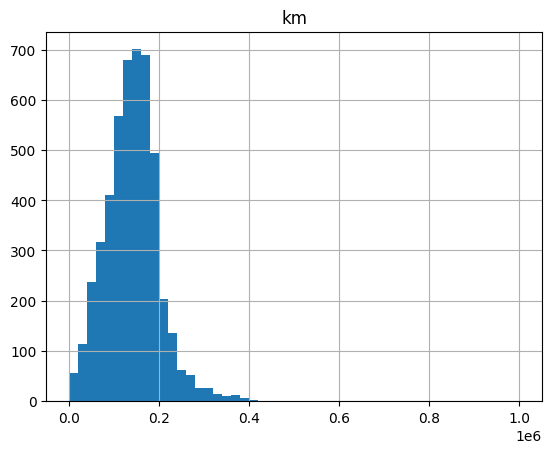

In [1605]:
print(df_bmw6.hist('km', bins = 50))

In [1606]:
df_bmw6['km'].describe()

count    4.817000e+03
mean     1.409353e+05
std      6.024268e+04
min     -6.400000e+01
25%      1.027580e+05
50%      1.409910e+05
75%      1.752350e+05
max      1.000376e+06
Name: km, dtype: float64

In [1607]:
df_bmw6[(df_bmw6['km'] > 0.4e+06) | (df_bmw6['km'] < 0)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,precio,fecha_venta,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL
539,520,484615.0,120.0,diesel,blue,estate,True,8300.0,2018-03-01,1,0,0,1
1550,320,400654.0,110.0,diesel,black,estate,False,1800.0,2018-07-01,0,1,0,1
2327,318,477571.0,85.0,diesel,grey,sin tipo_coche,True,1200.0,2018-07-01,0,0,0,0
2806,525,439060.0,105.0,diesel,silver,sin tipo_coche,False,100.0,2018-03-01,0,1,0,1
2915,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,75000.0,2018-04-01,1,0,0,1
3175,320,405816.0,100.0,diesel,blue,sedan,False,500.0,2018-05-01,0,0,0,1
3709,118,1000376.0,90.0,diesel,sin color,sin tipo_coche,False,1400.0,2018-06-01,1,0,0,1


In [1608]:
df_bmw7 = df_bmw6.copy()

In [1609]:
df_bmw7[(df_bmw7['km'] > 0.4e+06) | (df_bmw7['km'] < 0)].index

Index([539, 1550, 2327, 2806, 2915, 3175, 3709], dtype='int64')

In [1610]:
df_bmw7.drop(df_bmw7[(df_bmw7['km'] > 0.4e+06) | (df_bmw7['km'] < 0)].index, inplace=True)

[[<Axes: title={'center': 'km'}>]]


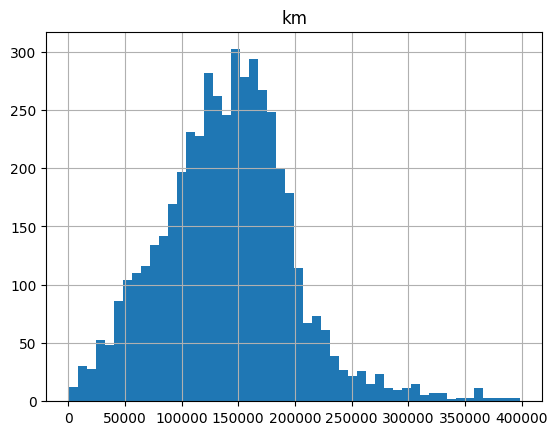

In [1611]:
print(df_bmw7.hist('km', bins = 50))

4.1.2. POTENCIA

[[<Axes: title={'center': 'potencia'}>]]


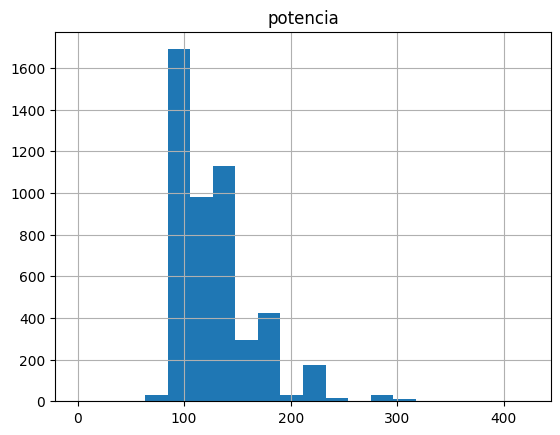

In [1612]:
print(df_bmw7.hist('potencia', bins = 20))

[[<Axes: title={'center': 'potencia'}>]]


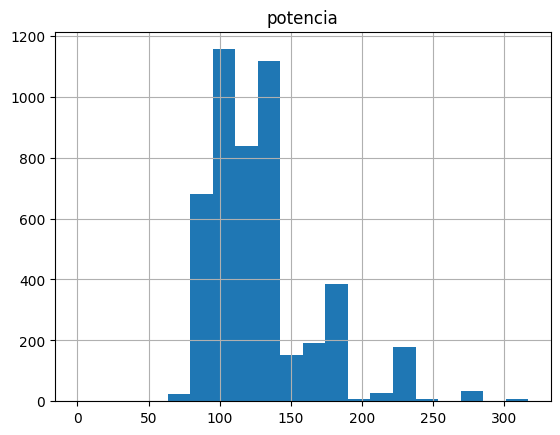

In [1613]:
df_bmw7.drop(df_bmw7[(df_bmw7['potencia'] > 350)].index, inplace=True)
print(df_bmw7.hist('potencia', bins = 20))

In [1614]:
df_bmw7.reset_index(drop=True, inplace=True)

In [1615]:
len(df_bmw6) - len(df_bmw7)

9

4.2. Analizar las variables categóricas

In [1616]:
lcat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'fecha_venta']

In [1617]:
pd.set_option('display.max_rows', None)

In [1618]:
for i in lcat:
    print(df_bmw7[i].value_counts(), '\n')

modelo
320                  745
520                  629
318                  561
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  181
530                  157
118                  142
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
730                   33
420 Gran Coupé        33
330                   33
520 Gran Turismo      23
325                   19
740                   18
530 Gran Turismo      18
640 Gran Coupé        18
X5 M                  17
114                   15
218 Active Tourer     13
218                   12
M550                  12
218 Gran Tourer        9
418 Gran Coupé         8
640                    7
335                    7
M3                     7
X6 M                   7
Z4                     6
528               

In [1619]:
df_bmw8 = df_bmw7.copy()

4.2.1 MODELO: no considero tenga que hacer nada

In [1620]:
df_bmw8['modelo'].value_counts()

modelo
320                  745
520                  629
318                  561
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  181
530                  157
118                  142
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
730                   33
420 Gran Coupé        33
330                   33
520 Gran Turismo      23
325                   19
740                   18
530 Gran Turismo      18
640 Gran Coupé        18
X5 M                  17
114                   15
218 Active Tourer     13
218                   12
M550                  12
218 Gran Tourer        9
418 Gran Coupé         8
640                    7
335                    7
M3                     7
X6 M                   7
Z4                     6
528               

In [1621]:
df_bmw8.groupby(['modelo','tipo_coche'])['precio'].mean()

modelo             tipo_coche    
 Active Tourer     van               19000.000000
114                hatchback         10500.000000
                   sin tipo_coche    11000.000000
                   subcompact        12525.000000
116                estate            11550.000000
                   hatchback          9604.188482
                   sedan              9433.333333
                   sin tipo_coche     9442.452830
                   subcompact        10167.857143
118                convertible        6100.000000
                   coupe              8650.000000
                   hatchback         10208.860759
                   sedan             11000.000000
                   sin tipo_coche     9361.363636
                   subcompact         7953.846154
120                convertible        8950.000000
                   hatchback         13006.250000
                   sedan             12900.000000
                   sin tipo_coche    12892.307692
                

4.2.2 TIPO_GASOLINA: agrupamos Diesel & diesel y borramos los registro de hibrido y eléctrico por haber muy poca muestra

In [1622]:
df_bmw8['tipo_gasolina'] = df_bmw8['tipo_gasolina'].str.lower()
df_bmw8.drop(df_bmw8[(df_bmw8['tipo_gasolina'] != 'diesel') & (df_bmw8['tipo_gasolina'] != 'petrol')].index, inplace=True)
df_bmw8['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4608
petrol     189
Name: count, dtype: int64

4.2.3 COLOR: no considero debo realizar ninguna acción

4.2.4 TIPO_COCHE: no considero debo realizar ninguna acción

4.2.5 AIRE_ACONDICIONADO: no considero debo realizar ninguna acción

4.2.6 FECHA_VENTA: Elimino los registros anteriores al 2018. Al quedarme solo registros del 2018, creo campo con unícamente la información del mes y elimino el campo fecha_venta. Veo que solo tengo registros desde enero a septiembre.

In [1623]:
df_bmw8.drop(df_bmw8[(df_bmw8['fecha_venta'] < '2018-01-01')].index, inplace=True)

In [1624]:
df_bmw8['fecha_venta'].value_counts()

fecha_venta
2018-05-01    807
2018-03-01    725
2018-04-01    683
2018-06-01    600
2018-07-01    533
2018-08-01    525
2018-02-01    494
2018-09-01    221
2018-01-01    205
Name: count, dtype: int64

In [1625]:
df_bmw9 = df_bmw8.copy()

In [1626]:
df_bmw9['mes_venta'] = pd.to_datetime(df_bmw9['fecha_venta']).dt.month

In [1627]:
del(df_bmw9['fecha_venta'])

array([[<Axes: title={'center': 'mes_venta'}>]], dtype=object)

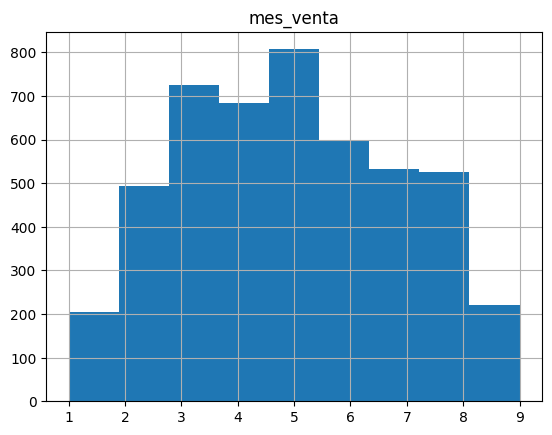

In [1628]:
df_bmw9.hist('mes_venta', bins = 9)

5. Análisis correlaciones: de las variables numéricas y booleanes parece que únicamente la potencia y el precio están correlacionados.

In [1629]:
corr = df_bmw9.corr(numeric_only=True)

In [1630]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,mes_venta
km,1.000000,-0.040857,-0.409148,0.072543,0.002263,0.054374,0.163365,-0.002109
potencia,-0.040857,1.000000,0.640247,0.327179,0.314683,0.345382,0.007534,-0.031096
precio,-0.409148,0.640247,1.000000,0.266917,0.256725,0.269885,-0.004474,0.015431
volante_regulable_BOOL,0.072543,0.327179,0.266917,1.000000,0.254429,0.278376,0.243632,0.080231
camara_trasera_BOOL,0.002263,0.314683,0.256725,0.254429,1.000000,0.199803,0.060252,0.019646
elevalunas_electrico_BOOL,0.054374,0.345382,0.269885,0.278376,0.199803,1.000000,0.202217,-0.024431
gps_BOOL,0.163365,0.007534,-0.004474,0.243632,0.060252,0.202217,1.000000,0.062572
mes_venta,-0.002109,-0.031096,0.015431,0.080231,0.019646,-0.024431,0.062572,1.000000


Al analizar el precio veo que hay dos outliers que voy a borrar

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

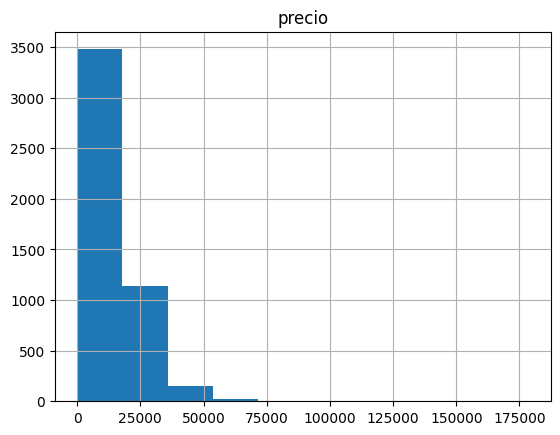

In [1631]:
df_bmw9.hist("precio")

<Axes: xlabel='precio'>

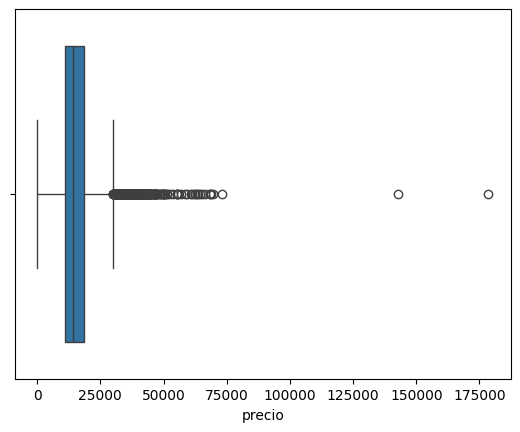

In [1632]:
sns.boxplot(x=df_bmw9["precio"])

In [1633]:
df_bmw9[df_bmw9['precio'] > 75000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,mes_venta
4652,X4,103222.0,140.0,diesel,grey,suv,True,142800.0,1,0,1,1,8
4721,X3,72515.0,135.0,diesel,blue,suv,False,178500.0,0,1,0,0,8


In [1634]:
df_bmw9.drop(df_bmw9[df_bmw9['precio'] > 75000].index, inplace=True)

In [1635]:
df_bmw9.reset_index

<bound method DataFrame.reset_index of                  modelo        km  potencia tipo_gasolina      color  \
0                   118  140411.0     100.0        diesel      black   
1                    M4   13929.0     317.0        petrol       grey   
2                   320  183297.0     120.0        diesel      white   
3                   420  128035.0     135.0        diesel        red   
4                   425   97097.0     160.0        diesel     silver   
5                   335  152352.0     225.0        petrol      black   
6                   325  205219.0     145.0        diesel       grey   
7                   118  115560.0     105.0        petrol      white   
8                    Z4  123886.0     125.0        petrol      black   
9                   320  139541.0     135.0        diesel      white   
10                  320   77115.0     135.0        diesel       blue   
11                  325  228000.0     145.0        diesel      black   
12                  420  

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

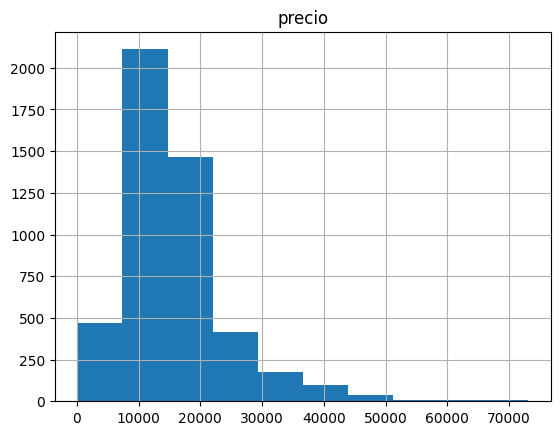

In [1636]:
df_bmw9.hist("precio")

In [1637]:
df_bmw9["log_precio"]=np.log10(df_bmw9["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

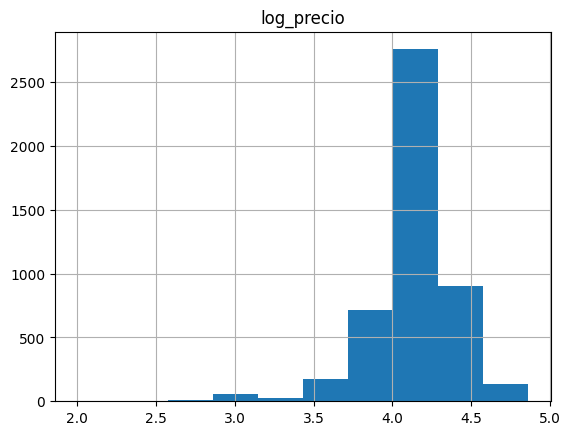

In [1638]:
df_bmw9.hist("log_precio")

<Axes: xlabel='log_precio'>

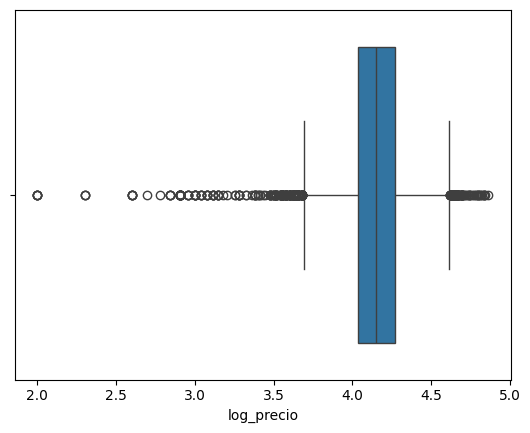

In [1639]:
sns.boxplot(x=df_bmw9["log_precio"])

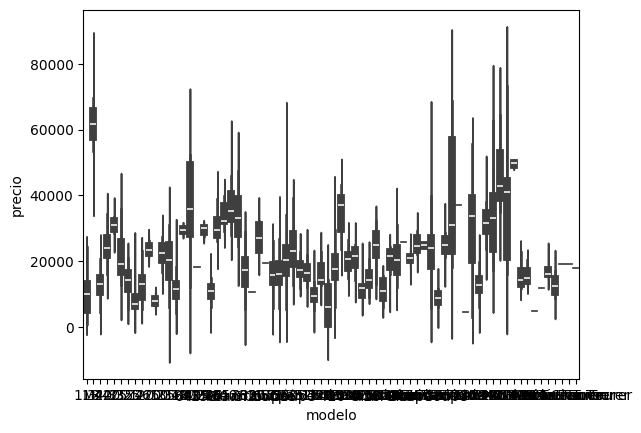

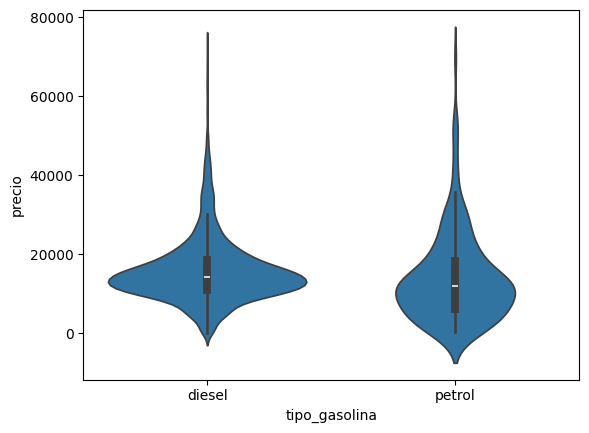

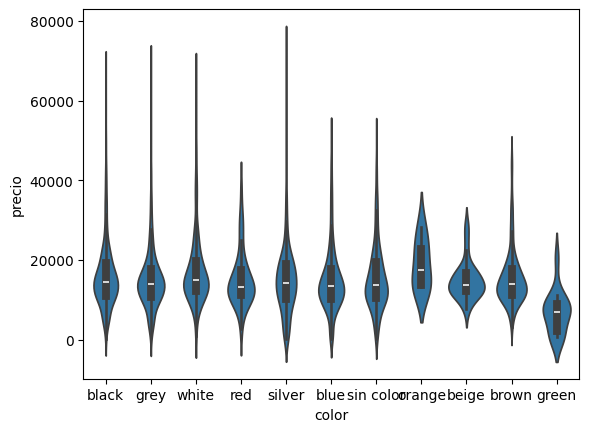

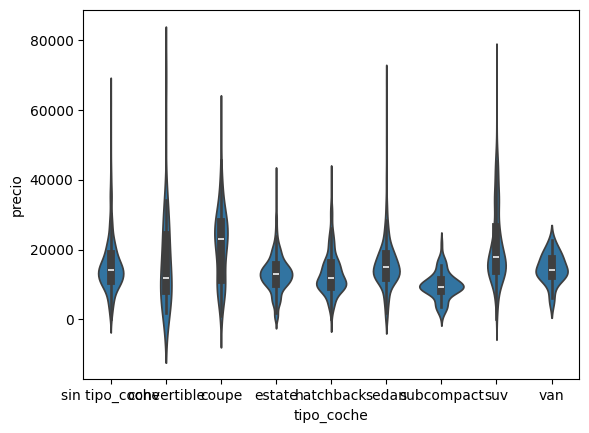

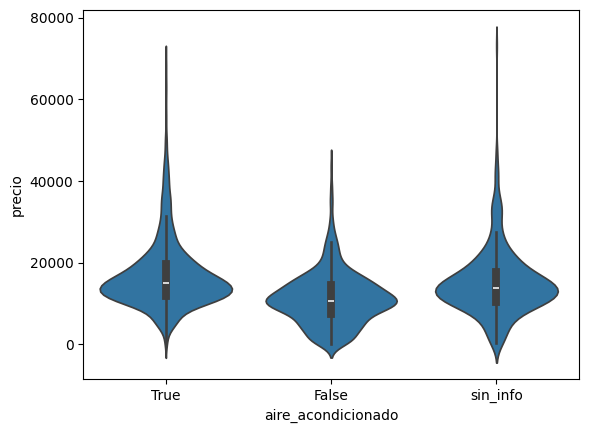

In [1640]:
for i in df_bmw9:
  if (df_bmw9[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw9)

In [1641]:
lnum

['km', 'potencia']

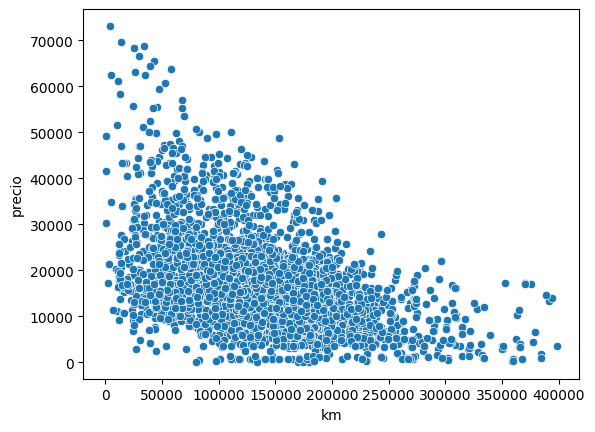

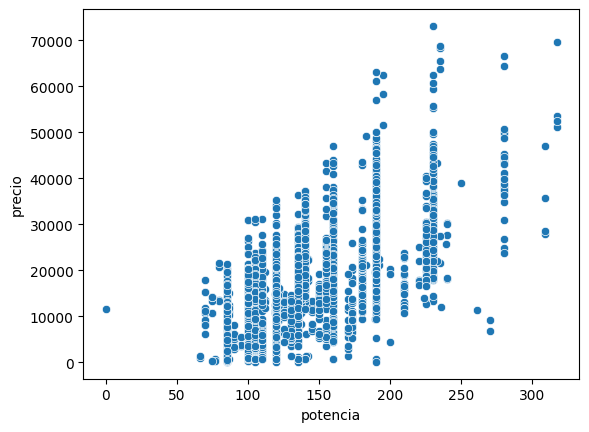

In [1642]:
for i in lnum:
  plt.figure()
  sns.scatterplot(x=i,y="precio", data=df_bmw9)

6. Transformación de variables categóricas a numéricas con el get_dumies:
'modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'aire_acondicionado'

In [1643]:
lcat2 = ['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'aire_acondicionado']

In [1644]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4791 entries, 0 to 4807
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   modelo                     4791 non-null   object 
 1   km                         4791 non-null   float64
 2   potencia                   4791 non-null   float64
 3   tipo_gasolina              4791 non-null   object 
 4   color                      4791 non-null   object 
 5   tipo_coche                 4791 non-null   object 
 6   aire_acondicionado         4791 non-null   object 
 7   precio                     4791 non-null   float64
 8   volante_regulable_BOOL     4791 non-null   int32  
 9   camara_trasera_BOOL        4791 non-null   int32  
 10  elevalunas_electrico_BOOL  4791 non-null   int32  
 11  gps_BOOL                   4791 non-null   int32  
 12  mes_venta                  4791 non-null   int32  
 13  log_precio                 4791 non-null   float64
dt

In [1645]:
df_bmw_prep = pd.get_dummies(data=df_bmw9, columns = lcat2)

In [1646]:
pd.set_option('display.max_columns', None)

In [1647]:
df_bmw_prep.sample(5)

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,mes_venta,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,modelo_135,modelo_214 Gran Tourer,modelo_216,modelo_216 Active Tourer,modelo_216 Gran Tourer,modelo_218,modelo_218 Active Tourer,modelo_218 Gran Tourer,modelo_220,modelo_220 Active Tourer,modelo_225,modelo_225 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_325 Gran Turismo,modelo_328,modelo_330,modelo_330 Gran Turismo,modelo_335,modelo_335 Gran Turismo,modelo_418 Gran Coupé,modelo_420,modelo_420 Gran Coupé,modelo_425,modelo_430,modelo_430 Gran Coupé,modelo_435,modelo_435 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_523,modelo_525,modelo_528,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_535 Gran Turismo,modelo_630,modelo_635,modelo_640,modelo_640 Gran Coupé,modelo_650,modelo_730,modelo_735,modelo_740,modelo_750,modelo_M135,modelo_M235,modelo_M3,modelo_M4,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_sin color,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo_coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin_info
203,163879.0,120.0,8600.0,0,0,0,1,6,3.934498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1371,194482.0,105.0,10700.0,0,0,0,1,6,4.029384,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3098,150586.0,190.0,24300.0,1,0,0,1,5,4.385606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3621,94380.0,85.0,9000.0,0,0,0,1,2,3.954243,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fa

In [1648]:
pd.set_option("display.max_rows",None)

In [1649]:
df_bmw_prep.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4791 entries, 0 to 4807
Data columns (total 106 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    km                           float64
 1    potencia                     float64
 2    precio                       float64
 3    volante_regulable_BOOL       int32  
 4    camara_trasera_BOOL          int32  
 5    elevalunas_electrico_BOOL    int32  
 6    gps_BOOL                     int32  
 7    mes_venta                    int32  
 8    log_precio                   float64
 9    modelo_ Active Tourer        bool   
 10   modelo_114                   bool   
 11   modelo_116                   bool   
 12   modelo_118                   bool   
 13   modelo_120                   bool   
 14   modelo_123                   bool   
 15   modelo_125                   bool   
 16   modelo_135                   bool   
 17   modelo_214 Gran Tourer       bool   
 18   modelo_216                   bo

7. Normalización de las variables numéricas: uso el método minmax

In [1650]:
lnum

['km', 'potencia']

In [1651]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw_prep[variable_transformar]=minMaxResultado.fit_transform(df_bmw_prep[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [1652]:
for i in lnum:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [1653]:
df_bmw_prep.sample(5)

,km,potencia,precio,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL,mes_venta,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,modelo_135,modelo_214 Gran Tourer,modelo_216,modelo_216 Active Tourer,modelo_216 Gran Tourer,modelo_218,modelo_218 Active Tourer,modelo_218 Gran Tourer,modelo_220,modelo_220 Active Tourer,modelo_225,modelo_225 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_325 Gran Turismo,modelo_328,modelo_330,modelo_330 Gran Turismo,modelo_335,modelo_335 Gran Turismo,modelo_418 Gran Coupé,modelo_420,modelo_420 Gran Coupé,modelo_425,modelo_430,modelo_430 Gran Coupé,modelo_435,modelo_435 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_523,modelo_525,modelo_528,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_535 Gran Turismo,modelo_630,modelo_635,modelo_640,modelo_640 Gran Coupé,modelo_650,modelo_730,modelo_735,modelo_740,modelo_750,modelo_M135,modelo_M235,modelo_M3,modelo_M4,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_sin color,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin tipo_coche,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,aire_acondicionado_False,aire_acondicionado_True,aire_acondicionado_sin_info
4011,0.304072,0.441640,31500.0,1,0,1,1,3,4.498311,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2562,0.470919,0.378549,13000.0,0,0,0,1,2,4.113943,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3434,0.430315,0.473186,16100.0,1,0,0,1,7,4.206826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3625,0.231755,0.473186,11400.0,1,1,1,1,2,4.056905,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Fal

In [1654]:
df_bmw_prep.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4791 entries, 0 to 4807
Data columns (total 106 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    km                           float64
 1    potencia                     float64
 2    precio                       float64
 3    volante_regulable_BOOL       int32  
 4    camara_trasera_BOOL          int32  
 5    elevalunas_electrico_BOOL    int32  
 6    gps_BOOL                     int32  
 7    mes_venta                    int32  
 8    log_precio                   float64
 9    modelo_ Active Tourer        bool   
 10   modelo_114                   bool   
 11   modelo_116                   bool   
 12   modelo_118                   bool   
 13   modelo_120                   bool   
 14   modelo_123                   bool   
 15   modelo_125                   bool   
 16   modelo_135                   bool   
 17   modelo_214 Gran Tourer       bool   
 18   modelo_216                   bo

8. Análisis correlación final: la potencia es la variable más correlacionada positivamente y la siguiente son los km pero la correlación es negativa.

In [1655]:
corr = df_bmw_prep.corr()

In [1656]:
#La idea es quedarte con el triangulo superior, por eso luego se pone el resto a nulos
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [ ]:
#Stack sirve para hacer una transpuesta a una columna
corr2.stack()

In [1658]:
#borramos nulos
corr3=corr2.unstack().dropna()

In [1659]:
corr4 = corr3.sort_values()

In [1660]:
pd.set_option("display.max_rows",None)

In [ ]:
corr4

In [1662]:
corr.style.background_gradient(cmap='coolwarm')